# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh dari *public repositories* Kaggle dengan judul "Extrovert vs. Introvert Behavior Data". Dataset ini terdiri dari informasi terkait perilaku seperti waktu yang dihabiskan sendirian, kehadiran di acara sosial, dan keterlibatan media sosial, yang memungkinkan penerapannya dalam psikologi, sosiologi, pemasaran, dan machine learning.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [108]:
import kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [109]:
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/extrovert-vs-introvert-behavior-data


In [110]:
df = pd.read_csv(path + "/personality_dataset.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [112]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [113]:
df.describe(include='object')

,Stage_fear,Drained_after_socializing,Personality
count,2827,2848,2900
unique,2,2,2
top,No,No,Extrovert
freq,1417,1441,1491


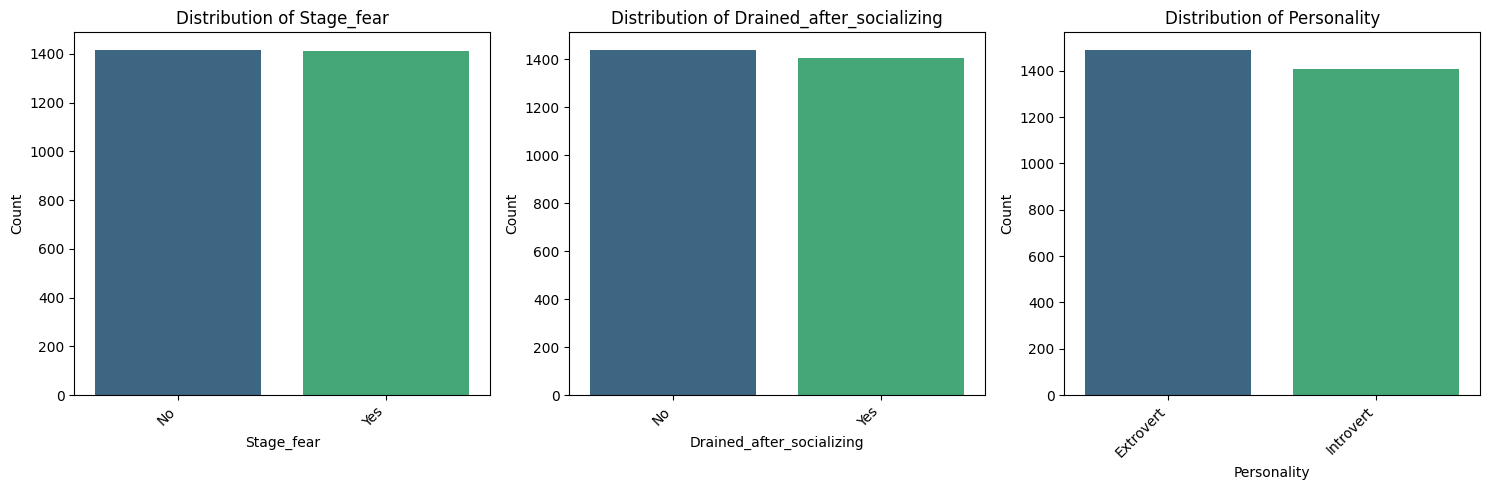

In [114]:
categorical_cols = df.select_dtypes(include='object').columns

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(categorical_cols):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.countplot(data=df, x=col, palette='viridis')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

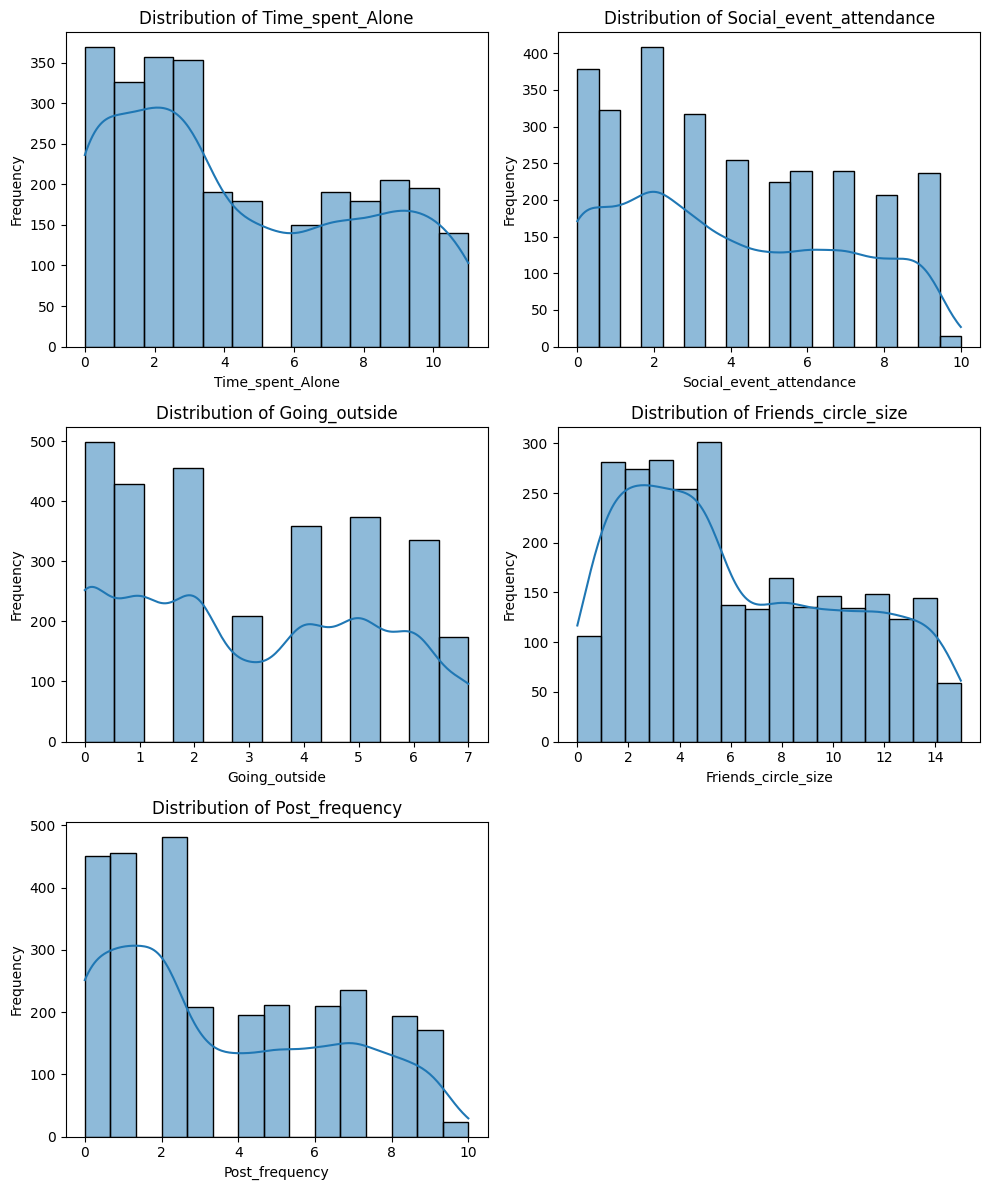

In [115]:
numerical_cols = df.select_dtypes(include=np.number).columns

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(numerical_cols):
  plt.subplot(n_rows, n_cols, i + 1)
  sns.histplot(data=df, x=col, kde=True, palette='viridis', hue=df.columns[0] if df.columns[0] in ['Extrovert_Introvert', 'extrovert_introvert'] else None)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

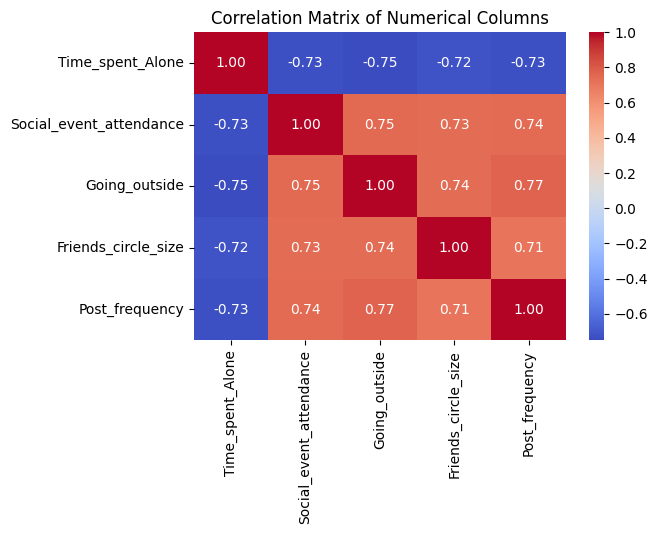

In [116]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Missing Values

In [117]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

missing_info = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase Missing': missing_percentage
})

print("Informasi Missing Values per Kolom:")
missing_info

Informasi Missing Values per Kolom:


,Jumlah Missing,Persentase Missing
Friends_circle_size,77,2.655172
Stage_fear,73,2.517241
Going_outside,66,2.275862
Post_frequency,65,2.241379
Time_spent_Alone,63,2.172414
Social_event_attendance,62,2.137931
Drained_after_socializing,52,1.793103


In [118]:
numerical_cols_with_missing = missing_info[missing_info.index.isin(numerical_cols)].index
categorical_cols_with_missing = missing_info[missing_info.index.isin(categorical_cols)].index

if len(numerical_cols_with_missing) > 0:
  imputer_numerical = SimpleImputer(strategy='median')
  df[numerical_cols_with_missing] = imputer_numerical.fit_transform(
      df[numerical_cols_with_missing]
  )

if len(categorical_cols_with_missing) > 0:
  imputer_categorical = SimpleImputer(strategy='most_frequent')
  df[categorical_cols_with_missing] = imputer_categorical.fit_transform(
      df[categorical_cols_with_missing]
  )
print("\nJumlah missing values setelah imputasi:")
print(df.isnull().sum().sum())



Jumlah missing values setelah imputasi:
0


## Outlier

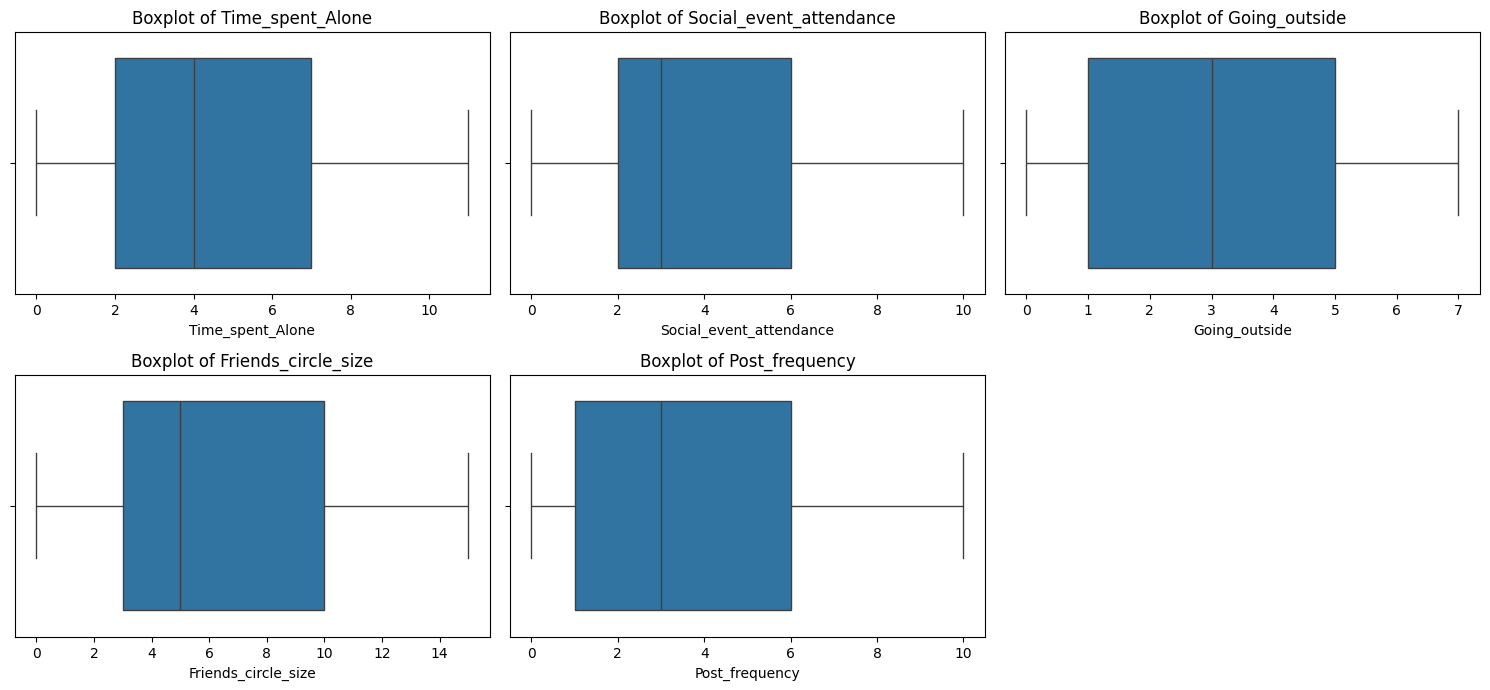

In [119]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)  # Adjust the grid size based on the number of numerical columns
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

## Encoding

In [120]:
categorical_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

print("Data setelah encoding:")
print(df.head())

Data setelah encoding:
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0                  8.0             5.0            0  


## Normalisasi

In [122]:
numerical_cols = df.select_dtypes(include=np.number).columns
cols_to_scale = [col for col in numerical_cols if col != 'Personality']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Data setelah normalisasi:")
print(df.head())

Data setelah normalisasi:
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0         -0.143788   -0.972784                 0.019907       1.350613   
1          1.309119    1.027977                -1.371160      -1.350613   
2          1.309119    1.027977                -1.023393      -0.450204   
3         -1.306113   -0.972784                 0.715440       1.800817   
4         -0.434369   -0.972784                 1.758740       0.450204   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                  -0.970772             1.596787        0.500271            0  
1                   1.030108            -1.471766       -0.190744            1  
2                   1.030108            -0.291553       -0.536251            1  
3                  -0.970772             1.832829        1.536793            0  
4                  -0.970772             0.416574        0.500271            0  


In [126]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [127]:
train_df.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)